# Human Emotion Recognition Through Speech

Mounting the drive to get dataset and store the files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#installing keras
!pip install -q Keras==2.3.0


     |████████████████████████████████| 378kB 3.5MB/s 


Importing libraries

In [0]:
%tensorflow_version 2.0.x
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0.x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.0.0


In [0]:
import keras

print(keras.__version__)

2.3.0


Using TensorFlow backend.


In [0]:

import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from sklearn.metrics import confusion_matrix

In [0]:
from keras import regularizers
import os

In [0]:
mylist= os.listdir(r"/content/drive/My Drive/Colab Notebooks/Speech-Emotion-Analyzer-master/dataset")

In [0]:
type(mylist)

list

In [0]:
print(mylist[11])

03-01-03-02-02-01-21.wav


In [0]:
print(mylist[400][6:-16])

05


### Plotting the audio file's waveform and its spectogram

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Colab Notebooks/Speech-Emotion-Analyzer-master/dataset/03-01-03-01-02-02-03.wav')
print(type(data))
print(type(sampling_rate))

<class 'numpy.ndarray'>
<class 'int'>


Populating the interactive namespace from numpy and matplotlib


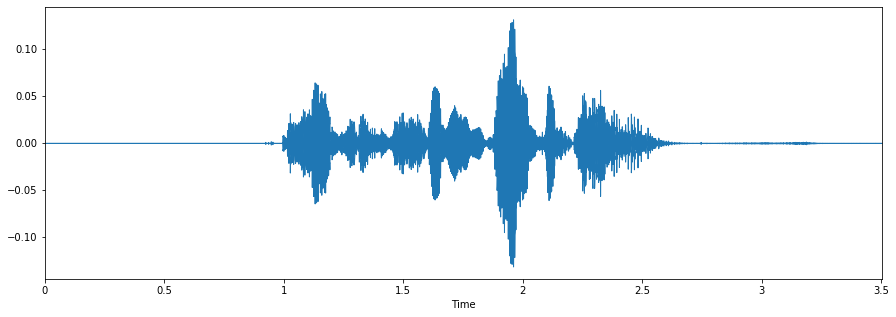

In [0]:
% pylab inline
import os 
import pandas as pd 
import librosa 
import librosa.display
import glob

plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)

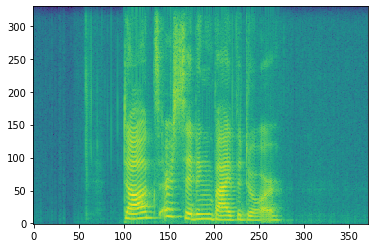

In [0]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys



x,sr = librosa.load('/content/drive/My Drive/Colab Notebooks/Speech-Emotion-Analyzer-master/dataset/03-01-03-01-02-02-02.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [0]:
mylist[:10]

['03-01-03-02-02-01-04.wav',
 '03-01-03-02-02-01-05.wav',
 '03-01-03-02-02-01-13.wav',
 '03-01-03-02-02-01-14.wav',
 '03-01-03-02-02-01-15.wav',
 '03-01-03-02-02-01-11.wav',
 '03-01-03-02-02-01-18.wav',
 '03-01-03-02-02-01-12.wav',
 '03-01-03-02-02-01-16.wav',
 '03-01-03-02-02-01-17.wav']

# **Setting the labels**

In [0]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

feeling_list[:10]


['female_happy',
 'male_happy',
 'male_happy',
 'female_happy',
 'male_happy',
 'male_happy',
 'female_happy',
 'female_happy',
 'female_happy',
 'male_happy']

In [0]:
labels = pd.DataFrame(feeling_list)
type(labels)

pandas.core.frame.DataFrame

In [0]:
labels

,0
0,female_happy
1,male_happy
2,male_happy
3,female_happy
4,male_happy
...,...
955,male_happy
956,female_happy
957,male_happy
958,female_happy


In [0]:
size(labels)

960

### Getting the features of audio files using librosa

In [0]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load(path='/content/drive/My Drive/Colab Notebooks/Speech-Emotion-Analyzer-master/dataset/' +y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1


In [0]:
print(df[:3])


                                             feature
0  [-52.68002860674141, -52.68002860674141, -52.6...
1  [-50.18753831967282, -48.99406400325115, -50.6...
2  [-52.98562964452439, -52.98562964452439, -52.9...


In [0]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [0]:
df['feature']

0      [-52.68002860674141, -52.68002860674141, -52.6...
1      [-50.18753831967282, -48.99406400325115, -50.6...
2      [-52.98562964452439, -52.98562964452439, -52.9...
3      [-47.93916367725944, -47.93916367725944, -47.9...
4      [-47.260842610544664, -44.14271143646705, -44....
                             ...                        
955    [-58.3804491487565, -58.28443459232707, -57.44...
956    [-54.412140927426236, -49.64446655485598, -48....
957    [-46.87425700894879, -47.98857923661903, -48.3...
958    [-38.35341525104271, -37.543822941285256, -38....
959    [-54.181856857822986, -53.6533025975521, -52.1...
Name: feature, Length: 960, dtype: object

In [0]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [0]:
newdf = pd.concat([df3,labels], axis=1)

In [0]:
newdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
0,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.536529,-52.616255,-52.680029,-52.680029,-52.680029,-51.903028,-51.025408,...,-35.924440,-38.759032,-39.828809,-39.453622,-42.034676,-44.510344,-44.443945,-44.563175,-45.853015,-49.454610,-49.423183,-48.752468,-47.687025,-49.078200,-51.559188,-51.926700,-50.368376,-50.444488,-51.078779,-52.572045,-52.405503,-52.228318,-52.323783,-52.680029,-52.680029,-52.613820,-52.574927,-52.680029,-52.680029,-52.680029,-52.371020,-52.559699,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,female_happy
1,-50.187538,-48.994064,-50.690301,-51.610253,-50.934358,-50.799105,-50.982488,-52.258082,-53.582803,-53.753509,-54.904844,-55.229164,-53.710737,-53.224889,-53.908257,-53.988813,-53.031986,-51.589578,-51.939818,-54.172256,-53.264986,-51.162673,-51.388908,-46.624332,-44.175219,-44.222388,-47.647243,-42.068222,-36.330330,-32.646984,-30.672741,-31.317073,-30.847503,-28.751014,-26.149556,-27.214641,-30.473945,-32.911624,-32.276810,-32.043811,...,-28.586394,-28.256343,-28.134030,-28.589704,-28.784311,-27.283001,-26.531429,-26.454630,-25.887746,-26.954815,-28.220497,-26.909549,-27.681484,-28.294627,-29.207036,-30.983550,-32.409355,-36.719554,-36.670920,-37.907694,-41.458967,-42.467432,-42.372664,-44.691410,-44.344961,-43.833180,-43.061406,-44.492861,-47.924944,-49.684930,-49.128157,-50.449007,-52.066174,-52.084564,-52.100233,-49.985992,-51.780159,-55.655984,-52.570900,male_happy
2,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.694577,-52.417689,-52.985630,-52.591039,-52.348755,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.017266,-50.938415,-51.020931,-52.401670,-52.740723,-52.800668,-52.985630,-52.380305,-52.021820,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.622639,-52.985630,-52.985630,-52.985630,-52.028178,-48.542959,-48.168245,-47.032099,-43.926635,...,-41.832774,-42.017541,-41.451702,-41.401862,-43.972191,-44.577233,-46.675472,-48.300462,-48.345243,-45.851937,-47.252314,-49.746080,-50.227054,-49.426857,-48.943272,-48.629038,-47.623724,-47.404914,-46.267666,-47.425493,-46.321601,-46.865707,-49.160274,-50.139860,-49.877325,-49.217610,-49.939551,-49.644531,-49.163566,-49.399837,-50.185491,-51.739141,-50.998987,-49.365305,-50.085869,-49.356874,-49.608344,-50.406402,-51.193293,male_happy
3,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-48.054578,-48.390130,-48.443900,-48.891405,-49.472517,-48.572346,-47.602732,-47.696725,-47.807980,-47.198370,-47.466071,-45.276303,-44.714777,-46.206400,-46.768060,-46.154539,-46.096270,-45.374552,-44.561389,-45.958860,-46.549269,-48.622141,-48.791279,-49.066022,-49.062253,-49.792893,-49.132405,-48.220440,-47.768301,...,-38.830807,-38.846394,-39.282369,-42.143128,-44.690591,-45.199042,-40.788136,-38.057777,-36.077741,-33.977509,-33.757852,-33.759097,-32.501245,-31.422669,-28.463540,-28.974567,-29.228372,-29.371361,-30.490865,-32.682865,-30.075554,-27.206548,-27.592790,-28.974495,-31.425956,-33.531281,-34.077311,-35.322056,-36.094124,-35.935620,-39.217297,-41.336362,-43.327110,-44.894975,-46.341667,-46.351427,-46.122215,-45.831167,-45.531867,female_happy
4,-47.260843,-44.142711,-44.478883,-47.246907,-50.295858,-49.791635,-48.512130,-44.795408,-43.321731,-44.179745,-47.370058,-47.262522,-44.719011,-44.113071,-44.785315,-46.695427,-

In [0]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [0]:
rnewdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
0,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.536529,-52.616255,-52.680029,-52.680029,-52.680029,-51.903028,-51.025408,...,-35.924440,-38.759032,-39.828809,-39.453622,-42.034676,-44.510344,-44.443945,-44.563175,-45.853015,-49.454610,-49.423183,-48.752468,-47.687025,-49.078200,-51.559188,-51.926700,-50.368376,-50.444488,-51.078779,-52.572045,-52.405503,-52.228318,-52.323783,-52.680029,-52.680029,-52.613820,-52.574927,-52.680029,-52.680029,-52.680029,-52.371020,-52.559699,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,-52.680029,female_happy
1,-50.187538,-48.994064,-50.690301,-51.610253,-50.934358,-50.799105,-50.982488,-52.258082,-53.582803,-53.753509,-54.904844,-55.229164,-53.710737,-53.224889,-53.908257,-53.988813,-53.031986,-51.589578,-51.939818,-54.172256,-53.264986,-51.162673,-51.388908,-46.624332,-44.175219,-44.222388,-47.647243,-42.068222,-36.330330,-32.646984,-30.672741,-31.317073,-30.847503,-28.751014,-26.149556,-27.214641,-30.473945,-32.911624,-32.276810,-32.043811,...,-28.586394,-28.256343,-28.134030,-28.589704,-28.784311,-27.283001,-26.531429,-26.454630,-25.887746,-26.954815,-28.220497,-26.909549,-27.681484,-28.294627,-29.207036,-30.983550,-32.409355,-36.719554,-36.670920,-37.907694,-41.458967,-42.467432,-42.372664,-44.691410,-44.344961,-43.833180,-43.061406,-44.492861,-47.924944,-49.684930,-49.128157,-50.449007,-52.066174,-52.084564,-52.100233,-49.985992,-51.780159,-55.655984,-52.570900,male_happy
2,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.694577,-52.417689,-52.985630,-52.591039,-52.348755,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.017266,-50.938415,-51.020931,-52.401670,-52.740723,-52.800668,-52.985630,-52.380305,-52.021820,-52.985630,-52.985630,-52.985630,-52.985630,-52.985630,-52.622639,-52.985630,-52.985630,-52.985630,-52.028178,-48.542959,-48.168245,-47.032099,-43.926635,...,-41.832774,-42.017541,-41.451702,-41.401862,-43.972191,-44.577233,-46.675472,-48.300462,-48.345243,-45.851937,-47.252314,-49.746080,-50.227054,-49.426857,-48.943272,-48.629038,-47.623724,-47.404914,-46.267666,-47.425493,-46.321601,-46.865707,-49.160274,-50.139860,-49.877325,-49.217610,-49.939551,-49.644531,-49.163566,-49.399837,-50.185491,-51.739141,-50.998987,-49.365305,-50.085869,-49.356874,-49.608344,-50.406402,-51.193293,male_happy
3,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-47.939164,-48.054578,-48.390130,-48.443900,-48.891405,-49.472517,-48.572346,-47.602732,-47.696725,-47.807980,-47.198370,-47.466071,-45.276303,-44.714777,-46.206400,-46.768060,-46.154539,-46.096270,-45.374552,-44.561389,-45.958860,-46.549269,-48.622141,-48.791279,-49.066022,-49.062253,-49.792893,-49.132405,-48.220440,-47.768301,...,-38.830807,-38.846394,-39.282369,-42.143128,-44.690591,-45.199042,-40.788136,-38.057777,-36.077741,-33.977509,-33.757852,-33.759097,-32.501245,-31.422669,-28.463540,-28.974567,-29.228372,-29.371361,-30.490865,-32.682865,-30.075554,-27.206548,-27.592790,-28.974495,-31.425956,-33.531281,-34.077311,-35.322056,-36.094124,-35.935620,-39.217297,-41.336362,-43.327110,-44.894975,-46.341667,-46.351427,-46.122215,-45.831167,-45.531867,female_happy
4,-47.260843,-44.142711,-44.478883,-47.246907,-50.295858,-49.791635,-48.512130,-44.795408,-43.321731,-44.179745,-47.370058,-47.262522,-44.719011,-44.113071,-44.785315,-46.695427,-

In [0]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
948,-42.217434,-40.560479,-40.231336,-41.971320,-41.413196,-41.679765,-40.859462,-40.977621,-41.878338,-42.805991,-41.404515,-40.858316,-42.481726,-42.819418,-42.244397,-42.872791,-43.200067,-40.853911,-40.916381,-42.444713,-40.836677,-40.821655,-41.643746,-41.460077,-41.786832,-43.533949,-42.228367,-42.475139,-43.979358,-43.957435,-43.624840,-43.695546,-43.567512,-43.622786,-43.979358,-43.586575,-43.170961,-42.718031,-41.798551,-41.519354,...,-27.778625,-25.463039,-24.305827,-23.654808,-23.224242,-21.142351,-19.734271,-17.672047,-16.296129,-15.564604,-14.143131,-13.476160,-14.193847,-16.005384,-14.193459,-12.745988,-11.245783,-11.556852,-13.303703,-12.528575,-14.727328,-16.155582,-17.363188,-18.618875,-18.223319,-19.578475,-23.076902,-29.728530,-29.480108,-30.497267,-31.011208,-31.791346,-34.396537,-34.452414,-34.094194,-35.161084,-35.943979,-37.234014,-38.118160,male_happy
712,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.719775,-59.586931,-58.760883,-60.796276,-54.154070,-49.286875,-52.813107,-56.508547,-57.032361,-61.234234,-63.367042,-59.434034,-56.931148,-59.054948,-60.509700,-58.354946,-57.554822,-58.317157,-55.733362,...,-22.340548,-23.090613,-25.129112,-28.034446,-29.961921,-31.373282,-29.617030,-26.370936,-25.272197,-24.020003,-22.769912,-24.820585,-27.850333,-28.719136,-28.750401,-28.792367,-27.277879,-24.330582,-23.048364,-24.050207,-24.006705,-23.916887,-25.108259,-25.231322,-25.024670,-24.087779,-23.728342,-23.175014,-23.008041,-23.142724,-23.274047,-23.532521,-24.240024,-25.887856,-26.925746,-26.725288,-27.133949,-28.466279,-29.287304,male_calm
252,-53.678315,-54.377914,-55.140844,-56.300240,-55.326932,-55.119810,-56.282534,-54.970338,-53.334915,-52.519249,-52.901627,-54.579591,-54.657994,-55.171305,-56.333233,-55.510632,-55.360647,-54.308440,-53.207838,-52.577464,-52.621565,-52.829384,-53.013698,-53.547680,-52.986798,-52.916899,-52.973908,-53.883321,-55.571190,-56.601710,-56.599791,-56.611024,-56.611024,-56.532695,-55.530622,-54.930637,-53.668872,-53.523648,-54.753323,-55.976200,...,-33.745493,-33.340758,-34.937311,-34.968645,-34.489946,-33.352489,-32.793917,-32.843895,-33.121489,-34.979073,-35.857271,-36.661351,-37.769086,-39.077761,-39.826140,-38.998027,-40.061464,-42.368755,-43.370925,-44.998254,-45.225228,-43.714666,-45.741522,-48.671925,-50.799731,-50.734320,-51.840683,-52.103432,-51.085394,-49.583532,-50.354847,-51.740110,-53.151655,-53.596402,-53.313462,-53.512526,-55.573837,-56.696713,-56.354921,female_angry
657,-53.973089,-54.414271,-54.019228,-53.768910,-54.355623,-56.858708,-59.874911,-61.195373,-62.126527,-59.115341,-56.862642,-59.144033,-66.544240,-65.196181,-60.125745,-56.173401,-54.843040,-55.073670,-56.517547,-56.173234,-57.438301,-59.694061,-61.811325,-57.798939,-54.832974,-52.678619,-51.840928,-51.676757,-50.880514,-51.461723,-52.582857,-57.238783,-60.081675,-60.021869,-56.682087,-54.855795,-52.775164,-51.713014,-52.721940,-53.249691,...,-32.302723,-33.047021,-31.987757,-31.744391,-30.872612,-30.651957,-31.015002,-31.500181,-32.593539,-32.776390,-32.495569,-33.337858,-35.884201,-36.340965,-36.268769,-38.043963,-42.591499,-41.742849,-41.688866,-44.186429,-44.366759,-44.032443,-45.305814,-45.671735,-49.972662,-51.568670,-51.528915,-51.790106,-55.831230,-61.262622,-59.767191,-58.772052,-56.262722,-58.589130,-57.304635,-55.471342,-56.585218,-54.511202,-54.561819,male_calm
268,-53.700269,-53.832939,-55.695274,-55.929055,-54.200609,-53.187270,-53.727313,-55.705841,-56.291958,-55.521416,-54.136957,-54.813161,-57.919093,-57.919093,-57.919093,-57.91

In [0]:
#Filling null values with zeroes
rnewdf=rnewdf.fillna(0)

In [0]:

newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [0]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
507,-56.514473,-58.217707,-59.190151,-58.814830,-59.682486,-60.168167,-60.022019,-59.729637,-59.597097,-59.299674,-58.695933,-57.907886,-56.807687,-55.564851,-55.108693,-54.396957,-54.462321,-53.238717,-52.420960,-51.736964,-51.498593,-51.255495,-50.214315,-48.764770,-47.148507,-47.775083,-46.972091,-44.885108,-43.901795,-44.212186,-43.533918,-39.779345,-36.575623,-34.476836,-34.079831,-37.399653,-39.481551,-39.106988,-37.553858,-36.428077,...,-32.788152,-33.789222,-33.392025,-34.028924,-35.684573,-34.367495,-35.618162,-40.098545,-41.151080,-41.023619,-41.492836,-42.772981,-43.858444,-42.642198,-42.624936,-41.856977,-42.708354,-42.844303,-43.728458,-44.882738,-45.512390,-45.114973,-46.524025,-47.142363,-46.602431,-46.678218,-44.936428,-45.311863,-45.069079,-47.594014,-48.448074,-48.095615,-48.527489,-49.944095,-50.918081,-51.535160,-52.271117,-52.529648,-53.703810,male_fearful
807,-57.672392,-58.346810,-58.554084,-57.433392,-56.866218,-57.498199,-57.134196,-57.447027,-57.418482,-57.487695,-57.953760,-58.034113,-58.044307,-57.686945,-56.554126,-55.566088,-55.504647,-56.586251,-57.144848,-56.370751,-57.622186,-58.483245,-58.175427,-58.145005,-58.134164,-58.134164,-58.134164,-58.134164,-58.134164,-57.883311,-57.280145,-57.552914,-58.134164,-58.134164,-58.134164,-58.134164,-58.134164,-58.124897,-58.134164,-58.052983,...,-33.526149,-33.654248,-34.147037,-35.237224,-37.486769,-38.538942,-38.172243,-39.569657,-41.716564,-41.905205,-42.458692,-44.304026,-44.747351,-45.068364,-48.212830,-48.853389,-48.011294,-49.482807,-50.408627,-48.858960,-49.450861,-48.052684,-52.341763,-52.689045,-49.290454,-50.315358,-53.058059,-51.243884,-51.011878,-54.805407,-54.916099,-54.858936,-56.772700,-55.587267,-54.187283,-52.968336,-53.157591,-52.669113,-52.821982,female_happy
649,-64.875457,-56.527522,-54.121294,-55.752116,-56.003069,-55.568747,-55.626640,-56.577684,-55.229808,-55.994159,-57.817785,-57.099362,-59.408919,-59.313822,-57.371133,-58.428588,-58.138438,-59.625588,-57.403101,-54.890216,-56.297295,-59.044466,-55.995040,-52.725689,-54.192270,-52.525412,-52.723970,-54.661522,-54.910216,-55.461974,-54.454751,-54.149488,-54.275481,-54.825930,-58.470167,-60.368735,-61.898790,-58.018107,-54.187910,-54.094561,...,-37.931274,-39.199489,-39.675008,-40.344534,-44.296654,-45.368339,-45.178546,-43.547522,-43.669088,-47.251133,-43.929840,-43.145372,-45.289233,-46.078700,-49.573968,-46.088721,-46.803645,-48.349750,-48.498349,-50.166112,-49.828432,-50.136321,-50.340241,-49.838275,-51.337343,-50.079791,-47.695540,-48.425517,-47.796584,-49.323589,-48.745186,-48.936182,-49.602462,-51.278961,-55.084093,-57.043379,-56.340079,-56.364012,-56.574606,male_calm
379,-42.465015,-42.583305,-43.101841,-43.019975,-42.306849,-41.415921,-40.329882,-40.658195,-41.503644,-42.401065,-41.799178,-41.236754,-40.235193,-39.384333,-39.414366,-40.177416,-40.618600,-40.263686,-40.254145,-40.690877,-40.331900,-39.987033,-39.854867,-39.964965,-39.596548,-37.261079,-37.196174,-38.149225,-38.758684,-36.623177,-34.547413,-32.496126,-30.719501,-27.805886,-28.408371,-33.700836,-37.168763,-36.553961,-34.211014,-35.373440,...,-35.547867,-35.046376,-37.446650,-40.049339,-39.785368,-38.692077,-37.487769,-35.556658,-36.774509,-39.122115,-40.471210,-41.285611,-38.599797,-36.033088,-36.182305,-36.641075,-37.157634,-38.408206,-33.168147,-29.804559,-28.556608,-28.982792,-30.370813,-32.050716,-28.141021,-27.957078,-31.359422,-34.203731,-36.626123,-34.861608,-29.760679,-26.804277,-24.726424,-25.497476,-27.301415,-27.844868,-30.855257,-20.573431,-11.128963,female_angry
730,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-70.763518,-

In [0]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [0]:
type(testfeatures)

pandas.core.frame.DataFrame

In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(np.ravel(y_train)))
y_test = np_utils.to_categorical(lb.fit_transform(np.ravel(y_test)))

In [0]:
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
X_train.shape

(773, 216)

### Changing dimension for CNN model

In [0]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [0]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(216,1)))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])


Removed the whole training part for avoiding unnecessary long epochs list

In [0]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=10, validation_data=(x_testcnn, y_test))

Train on 773 samples, validate on 187 samples
Epoch 1/10
773/773 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 0.9987 - val_loss: 5.7282 - val_accuracy: 0.4973
Epoch 2/10
773/773 [==============================] - 1s 940us/step - loss: 4.6126e-04 - accuracy: 1.0000 - val_loss: 5.5591 - val_accuracy: 0.5187
Epoch 3/10
773/773 [==============================] - 1s 900us/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 5.7430 - val_accuracy: 0.5134
Epoch 4/10
773/773 [==============================] - 1s 896us/step - loss: 2.7394e-04 - accuracy: 1.0000 - val_loss: 5.5390 - val_accuracy: 0.5134
Epoch 5/10
773/773 [==============================] - 1s 888us/step - loss: 7.7187e-04 - accuracy: 1.0000 - val_loss: 5.7204 - val_accuracy: 0.5134
Epoch 6/10
773/773 [==============================] - 1s 890us/step - loss: 3.6254e-04 - accuracy: 1.0000 - val_loss: 5.5274 - val_accuracy: 0.5080
Epoch 7/10
773/773 [==============================] - 1s 903us/step - loss: 

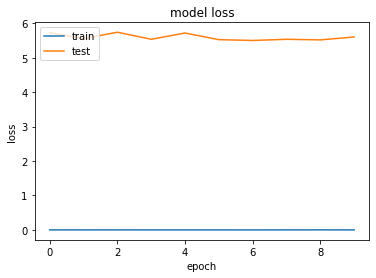

In [0]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [0]:

model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


### Loading the model

In [0]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 51.87%



### Predicting emotions on the test data

In [0]:
preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)

187/187 [==============================] - 0s 435us/step


In [0]:
preds

array([[3.1286465e-05, 6.7233258e-23, 1.4899113e-23, ..., 1.2599966e-03,
        2.2690209e-07, 9.6261218e-17],
       [4.1247518e-18, 2.3389019e-08, 1.6309081e-05, ..., 1.4081922e-25,
        1.6149064e-18, 5.0157238e-18],
       [9.7932665e-13, 9.9970031e-01, 2.4679667e-07, ..., 2.3547578e-10,
        5.6162467e-08, 2.6063034e-08],
       ...,
       [5.5289464e-11, 0.0000000e+00, 4.4800890e-12, ..., 2.3314859e-12,
        2.4830867e-33, 1.8929332e-20],
       [8.3713830e-06, 8.4301628e-27, 8.1111412e-26, ..., 1.4887737e-11,
        1.7258179e-01, 2.4391207e-07],
       [3.6259291e-08, 9.9029978e-07, 3.0294606e-01, ..., 6.8522519e-01,
        5.3966977e-04, 5.5418887e-08]], dtype=float32)

In [0]:
preds1=preds.argmax(axis=1)

In [0]:
preds1

array([5, 3, 1, 5, 2, 5, 5, 5, 7, 4, 1, 0, 2, 4, 5, 3, 3, 5, 2, 5, 2, 0,
       4, 0, 7, 2, 1, 2, 0, 1, 0, 4, 8, 7, 2, 8, 8, 8, 3, 1, 0, 1, 4, 8,
       1, 5, 8, 8, 6, 0, 4, 5, 2, 0, 5, 9, 9, 5, 3, 6, 8, 8, 4, 5, 3, 2,
       5, 2, 1, 7, 2, 1, 6, 3, 0, 6, 9, 4, 2, 6, 9, 6, 2, 7, 5, 0, 7, 3,
       5, 0, 6, 0, 3, 0, 2, 6, 6, 3, 7, 8, 5, 4, 1, 4, 0, 3, 9, 8, 5, 8,
       3, 6, 6, 5, 9, 0, 7, 3, 9, 9, 7, 5, 3, 2, 5, 1, 1, 0, 7, 2, 1, 6,
       2, 7, 0, 5, 4, 3, 3, 4, 6, 1, 2, 1, 4, 6, 8, 9, 1, 0, 6, 7, 1, 9,
       7, 6, 8, 9, 5, 0, 5, 8, 9, 4, 0, 1, 3, 0, 5, 3, 7, 4, 5, 0, 3, 0,
       0, 5, 6, 6, 6, 6, 5, 7, 3, 5, 7])

In [0]:
abc = preds1.astype(int).flatten()

In [0]:
predictions = (lb.inverse_transform((abc)))

In [0]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_angry
1,female_happy
2,female_calm
3,male_angry
4,female_fearful
5,male_angry
6,male_angry
7,male_angry
8,male_fearful
9,female_sad


In [0]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [0]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_happy
1,female_fearful
2,male_fearful
3,male_angry
4,female_fearful
5,male_angry
6,male_angry
7,male_angry
8,female_angry
9,female_sad


In [0]:
finaldf = actualdf.join(preddf)


### Actual v/s Predicted emotions

In [0]:
finaldf[170:180]

,actualvalues,predictedvalues
170,male_fearful,male_fearful
171,female_sad,female_sad
172,female_angry,male_angry
173,male_sad,female_angry
174,female_happy,female_happy
175,female_angry,female_angry
176,female_happy,female_angry
177,male_angry,male_angry
178,male_sad,male_calm
179,male_sad,male_calm


In [0]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,20
female_calm,16
female_fearful,19
female_happy,22
female_sad,20
male_angry,23
male_calm,11
male_fearful,15
male_happy,19


In [0]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,24
female_calm,18
female_fearful,18
female_happy,20
female_sad,15
male_angry,29
male_calm,20
male_fearful,16
male_happy,15


In [0]:
finaldf.to_csv('Predictions.csv', index=False)

## Live demo



In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Colab Notebooks/Speech-Emotion-Analyzer-master/output10.wav')

Populating the interactive namespace from numpy and matplotlib


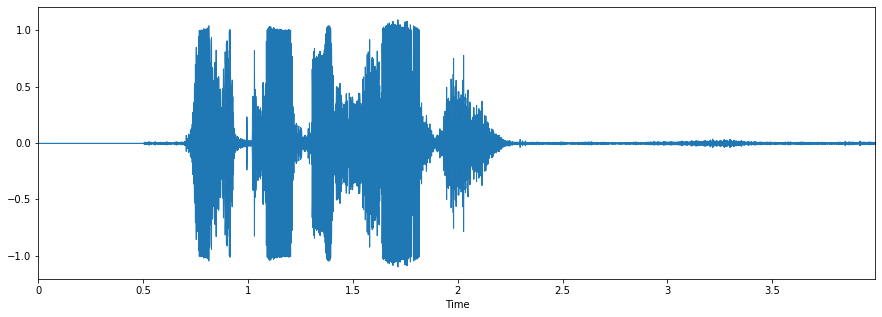

In [0]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [0]:

#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('/content/drive/My Drive/Colab Notebooks/Speech-Emotion-Analyzer-master/output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [0]:
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
livedf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-18.203564,-21.471836,-22.52221,-21.712259,-22.264288,-20.707904,-21.726444,-21.76865,-24.302736,-22.250634,-19.952749,-21.589886,-22.871398,-21.074195,-22.644074,-24.456729,-21.034204,-18.204837,-15.393931,-14.683821,-16.08818,-15.269258,-10.341141,-7.561026,-7.503775,-5.26073,-2.907981,-1.810235,-8.353989,-11.253944,-11.68832,-15.03596,-17.461964,-18.240293,-17.97851,-14.96761,-15.628132,-17.499977,-19.311693,-21.082069,...,-24.037475,-23.211411,-23.118687,-23.47167,-23.638604,-23.450209,-23.264921,-22.719472,-22.148715,-22.658383,-22.888619,-23.306036,-23.30761,-24.259128,-26.32821,-26.651806,-24.688917,-25.379468,-25.825301,-25.058121,-23.847226,-25.266713,-23.488472,-22.239727,-21.664203,-22.395563,-23.064722,-23.522365,-22.248783,-22.428017,-24.273819,-24.639939,-24.929152,-24.43919,-25.210171,-24.740646,-22.311913,-22.579805,-22.31466,-21.552436


In [0]:
twodim= np.expand_dims(livedf2, axis=2)

In [0]:
livepreds = loaded_model.predict(twodim, batch_size=32,  verbose=1)

1/1 [==============================] - 0s 6ms/step


In [0]:

livepreds

array([[8.9734542e-08, 0.0000000e+00, 1.3502744e-23, 1.1232040e-20,
        1.5530955e-38, 4.6649572e-12, 2.1392500e-24, 9.9999988e-01,
        1.1627043e-16, 4.4234220e-11]], dtype=float32)

In [0]:
livepreds1=livepreds.argmax(axis=1)

In [0]:
liveabc = livepreds1.astype(int).flatten()

In [0]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_fearful'], dtype=object)